In [6]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.graph import StateGraph, END, START, add_messages
from typing import TypedDict, Annotated

In [3]:
load_dotenv()
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [8]:
class JokeState(TypedDict):
    topic: str
    joke: str
    exp: str

In [9]:
def gen_joke(state: JokeState):

    prompt = f"Generate a joke on the following topic: \n{state["topic"]}"
    response = llm.invoke(prompt)
    return {"joke":response}

In [10]:
def exp_joke(state: JokeState):

    prompt = f"Explain the following joke: \n {state["joke"]}"
    response = llm.invoke(prompt)
    return {"exp":response}

In [11]:
graph = StateGraph(JokeState)

graph.add_node("gen_joke",gen_joke)
graph.add_node("exp_joke",exp_joke)

graph.add_edge(START,"gen_joke")
graph.add_edge("gen_joke","exp_joke")
graph.add_edge("exp_joke",END)

workflow = graph.compile()

In [13]:
initial_state = {"topic":"pizza"}
final_state = workflow.invoke(initial_state)

In [16]:
final_state["exp"].content

'This joke is a pun that plays on two phrases that sound very similar:\n\n1.  **"Deep dish"**: This refers to a specific type of pizza that has a very thick crust and is baked in a deep pan, allowing for a lot of cheese and toppings.\n2.  **"Distressed"**: This word means suffering from anxiety, sorrow, or pain; feeling troubled or worried. It\'s a stronger way of saying "sad."\n\nThe joke combines "deep dish" (the pizza type) with "distressed" (the emotional state) to create "deep dish-tressed." The humor comes from the clever wordplay, linking the physical characteristic of a pizza to the feeling of sadness.'

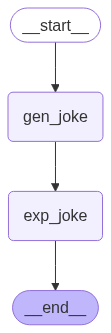

In [12]:
workflow